## Pre-processing and Visualization

In [1]:
# Import the required libraries.
import re
import math
import random
import collections
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
random.seed(15)
np.random.seed(15)

In [3]:
data = pd.read_csv('diabetes.arff', header = None)

# Drop the last column.
data = data.drop(data.columns[8], axis = 1)

In [4]:
data

,0,1,2,3,4,5,6,7
0,35.294118,74.371859,59.016393,35.353535,0.000000,50.074516,23.441503,48.333333
1,5.882353,42.713568,54.098361,29.292929,0.000000,39.642325,11.656704,16.666667
2,47.058824,91.959799,52.459016,0.000000,0.000000,34.724292,25.362938,18.333333
3,5.882353,44.723618,54.098361,23.232323,11.111111,41.877794,3.800171,0.000000
4,0.000000,68.844221,32.786885,35.353535,19.858156,64.232489,94.363792,20.000000
5,29.411765,58.291457,60.655738,0.000000,0.000000,38.152012,5.251921,15.000000
6,17.647059,39.195980,40.983607,32.323232,10.401891,46.199702,7.258753,8.333333
7,58.823529,57.788945,0.000000,0.000000,0.000000,52.608048,2.391119,13.333333
8,11.764706,98.994975,57.377049,45.454545,64.184397,45.454545,3.415884,53.333333
9,47.058824,62.814070,78.688525,0.000000,0.000000,0.000000,6.575576,55.000000


### Part A

In [5]:
# Normalize the dataframe.
X = data.apply(lambda column: (column - column.mean()) / column.std(), axis = 0)

In [6]:
clustering = DBSCAN(eps = 2, min_samples = 5).fit(X)
core_samples_mask = np.zeros_like(clustering.labels_, dtype = bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

### Part B

In [7]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

Text(0.5, 0.92, 'Estimated Number of Clusters: 3')

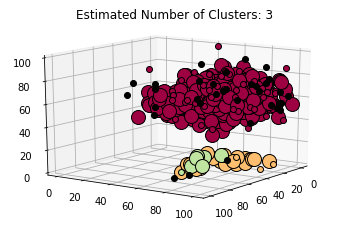

In [9]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.view_init(15, 35)

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    ax.plot3D(xy.iloc[:, 0], xy.iloc[:, 1], xy.iloc[:, 2], 'o', markerfacecolor = tuple(col),
             markeredgecolor = 'k', markersize = 14)

    xy = data[class_member_mask & ~core_samples_mask]
    ax.plot3D(xy.iloc[:, 0], xy.iloc[:, 1], xy.iloc[:, 2], 'o', markerfacecolor = tuple(col),
             markeredgecolor = 'k', markersize = 6)

ax.set_title('Estimated Number of Clusters: %d' % n_clusters_)